The goal this week is to pratice using Markdown to write descriptive text in notebooks and then look at Python data structures including the pandas module that supports data structures designed for handling the kind of data we'll be working with.  

There is probably too much work to complete here in the workshop session, but please use this notebook after the workshop to practice your Python.  Remember to commit your changes to git as you go and push back to Github when you are done.

In [1]:
student_name = "Nathaniel Roberts"
student_id = "47192968"

## Markdown Practice

Complete this section as per the instructions in the iLearn practical page.  Add the required cells below this one.

Here are three useful featres of [Markdown](https://daringfireball.net/projects/markdown/)

1. It is easy to write
2. It can be turned into HTML automatically
3. It can be ued to add simple formatting to text
    - for example **bold text** and *italics*
    - also different paragraph structures

This expression $\sqrt{3x-1} + (1+x)^2$ is an example of a TeX inline equation in a [Markdown-formatted](https://daringfireball.net/projects/markdown/) sentence.

Here is a sample of code:

`git pull --rebase upstream master`

and here is an image inserted into the page:

![The Git Logo!](https://git-scm.com/images/logos/downloads/Git-Logo-2Color.png)

## Lists and Dictionaries

First we look at some built in Python data structures: lists and dictionaries. 

A list is a sequence of things, unlike strongly typed languages (Java, C#) a list can contain a mixture of different types - there is no type for a list of integers or a list of lists.   Here are some lists:

In [2]:
ages = [12, 99, 51, 3, 55]
names = ['steve', 'jim', 'mary', 'carrie', 'zin']
stuff = [12, 'eighteen', 6, ['another', 'list']]

1. write code to print the first and third elements of each list
2. write code to select and print everything except the first element of each list
3. write a for loop that prints each element of the 'names' list

In [6]:
print(ages[0], ages[2])
print(names[0], names[2])
print(stuff[0], stuff[2])
print()

print(ages[1:])
print(names[1:])
print(stuff[1:])
print()

for name in names:
    print(name)

12 51
steve mary
12 6

[99, 51, 3, 55]
['jim', 'mary', 'carrie', 'zin']
['eighteen', 6, ['another', 'list']]

steve
jim
mary
carrie
zin


A dictionary is an associative array - it associates a value (any Python data type) with a key. The key is usually a string but can be any immutable type (string, number, tuple).  Here's some code that counts the occurence of words in a string.  It stores the count for each word in a dictionary using the word as a key. If the word is already stored in the dictionary, it adds one to the count, if not, it initialises the count to one.  

The second for loop iterates over the keys in the dictionary and prints one line per entry.

Modify this example to be a bit smarter:
- make sure that punctuation characters are not included as parts of a word, be careful with hyphens - should they be included or not?
- make the count use the lowercase version of a word, so that 'The' and 'the' are counted as the same word
- **Challenge**: find the first and second most frequent words in the text
- **Challenge**: take your code and write it as a function that takes a string and returns a list of words with their counts in order

In [11]:
description = """This unit introduces students to the fundamental techniques and 
tools of data science, such as the graphical display of data, 
predictive models, evaluation methodologies, regression, 
classification and clustering. The unit provides practical 
experience applying these methods using industry-standard 
software tools to real-world data sets. Students who have 
completed this unit will be able to identify which data 
science methods are most appropriate for a real-world data 
set, apply these methods to the data set, and interpret the 
results of the analysis they have performed. """

punc = '''!()[]{};:'"\,<>./?@#$%^&*_~'''

count = dict()
for word in description.split():
    for char in word:
        if char in punc:
            word = word.replace(char, "")
    word = word.lower()
    if word in count:
        count[word] += 1
    else:
        count[word] = 1
        
for word in count:
    print(word, count[word])

this 2
unit 3
introduces 1
students 2
to 4
the 6
fundamental 1
techniques 1
and 3
tools 2
of 3
data 6
science 2
such 1
as 1
graphical 1
display 1
predictive 1
models 1
evaluation 1
methodologies 1
regression 1
classification 1
clustering 1
provides 1
practical 1
experience 1
applying 1
these 2
methods 3
using 1
industry-standard 1
software 1
real-world 2
sets 1
who 1
have 2
completed 1
will 1
be 1
able 1
identify 1
which 1
are 1
most 1
appropriate 1
for 1
a 1
set 2
apply 1
interpret 1
results 1
analysis 1
they 1
performed 1


## Pandas Data Frames

[Pandas](https://pandas.pydata.org) is a Python module that provides some important data structures for Data Science work and a large collection of methods for data analysis. 

The two main data structures are the [Series]() and [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).  

A Series is a one dimensional array of data, but unlike the Python list the data is indexed - the index is like the dictionary key, any immutable value like a number or string.  You can use the label to select elements from the series as well as positional values.  

A DataFrame is analogous to a spreadsheet - a two dimensional table of data with indexed rows and named columns. 

You should read up on these and follow the examples in the text.  Here are a few exercises to complete with data frames.

You are given three csv files containing sample data.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ds1 = 'data/ds1.csv'
ds2 = 'data/ds2.csv'
ds3 = 'data/ds3.csv'

Write code below to read one of these data files into a pandas data frame and:
- show the first few rows: .head
- find the summary data for each column: .describe
- select just those rows where the value of x and y is over 50
- select the column 'x' and create a series
- plot the 'x' series as a line graph
- plot the dataframe as a scatterplot

Once you have the code for this, you can change the file you use for input of the data (ds2, ds3) and re-run the following cells to see the different output that is generated

In [25]:
ds1 = pd.read_csv("data/ds1.csv")
ds1.head()

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


In [26]:
ds1.describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


In [30]:
above_50 = ds1[(ds1["x"] > 50) & (ds1["y"] > 50)]
above_50.head()

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
22,53.0769,55.6410
23,56.6667,56.0256
24,59.2308,57.9487


In [31]:
x_series = ds1['x'].squeeze()
print(x_series)

0      55.3846
1      51.5385
2      46.1538
3      42.8205
4      40.7692
        ...   
137    39.4872
138    91.2821
139    50.0000
140    47.9487
141    44.1026
Name: x, Length: 142, dtype: float64


<Axes: >

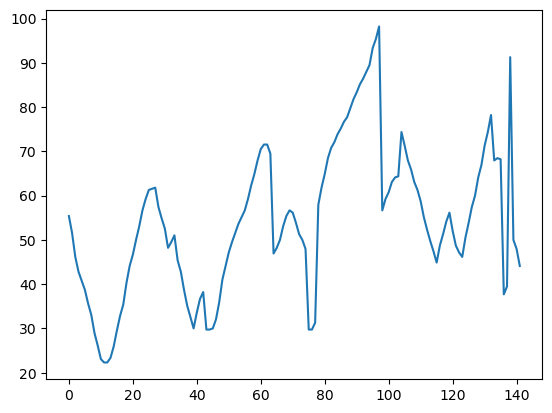

In [33]:
x_series.plot.line()

<Axes: xlabel='x', ylabel='y'>

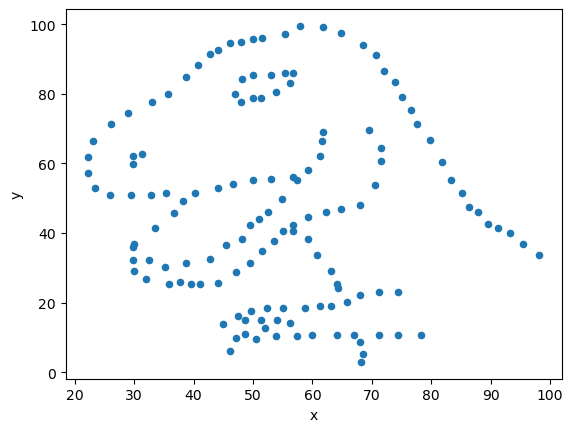

In [35]:
ds1.plot.scatter(x='x', y='y')

## Checkpoint

Congratulations! you have finished the required task for Week 2. Since you got this empty (without your code and output) notebook by downloading from iLearn, place this notebook (Workshop Week 2.ipynb) into your local copy of your Github repository (e.g. practical-workshops-sonitsingh)and commit your work with a suitable commit message and push your changes back to your Github repository. Show your tutor your updated Github repository to get your checkpoint mark.

# Further Practice

If you finish this task you can practice more with pandas data frames by following the examples in the text, section 2.6.  The CSV file that they use in that section is available in the `files` directory of this repository as `educ_figdp_1_Data.csv`.   

In [ ]:
edufile = 'files/educ_figdp_1_Data.csv'